In [2]:
#Part 0: Data Exploration

In [3]:
# importing libraries

import pandas as pd
import numpy as np
import random

from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from PIL import Image

import seaborn as sns

In [12]:
train = pd.read_csv(r'C:\Users\SWEEKRITHI SHETTY\Desktop\jigsaw-toxic-comment-classification-challenge (1)\train.csv\train.csv', encoding = 'latin-1')

In [14]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [20]:
print(train.shape)
display(train.head())

(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [24]:
# reading test comments

test = pd.read_csv(r'C:\Users\SWEEKRITHI SHETTY\Desktop\jigsaw-toxic-comment-classification-challenge (1)\test.csv\test.csv', encoding='latin-1')
print(test.shape)
display(test.head())

(153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [28]:
test_labels = pd.read_csv(r'C:\Users\SWEEKRITHI SHETTY\Downloads\jigsaw-toxic-comment-classification-challenge (1)\test_labels.csv\test_labels.csv')

In [30]:
print(test_labels.shape)
display(test_labels.head())

(153164, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [31]:
# extracting only the test labels that do not have -1 (these can be used later to demonstrate model deployment)

test_labels = test_labels[(test_labels['toxic'] > -1) 
                          & (test_labels['severe_toxic'] > -1) 
                          & (test_labels['obscene'] > -1) 
                          & (test_labels['threat'] > -1) 
                          & (test_labels['insult'] > -1) 
                          & (test_labels['identity_hate'] > -1)]
print(test_labels.shape)
display(test_labels.head())

(63978, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0


In [33]:

# combine test comments and labels
test_df = pd.merge(test_comments, test_labels, on='id')
print(test_df.shape)
display(test_df.head())

(63978, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [35]:
# combine whole data

df = pd.concat([train, test_df])
print(df.shape)
display(df.head())

(223549, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [36]:
# add a clean column

df['clean'] = np.where((df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate']) == 0, 1, 0)
print(df.shape)
display(df.head())

(223549, 9)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [42]:
# check distributions

cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'clean']
total = len(df)

for col in cols:
    print("\nLabel : {}".format(col))
    col_count = len(df[df[col]==1])
    print("Percentage : {} %".format(round(100*col_count/total, 2)))
    print("Value Counts : \n{}".format(df[col].value_counts()))


Label : toxic
21384
Percentage : 9.57 %
Value Counts : 
0    202165
1     21384
Name: toxic, dtype: int64

Label : severe_toxic
1962
Percentage : 0.88 %
Value Counts : 
0    221587
1      1962
Name: severe_toxic, dtype: int64

Label : obscene
12140
Percentage : 5.43 %
Value Counts : 
0    211409
1     12140
Name: obscene, dtype: int64

Label : threat
689
Percentage : 0.31 %
Value Counts : 
0    222860
1       689
Name: threat, dtype: int64

Label : insult
11304
Percentage : 5.06 %
Value Counts : 
0    212245
1     11304
Name: insult, dtype: int64

Label : identity_hate
2117
Percentage : 0.95 %
Value Counts : 
0    221432
1      2117
Name: identity_hate, dtype: int64

Label : clean
201081
Percentage : 89.95 %
Value Counts : 
1    201081
0     22468
Name: clean, dtype: int64


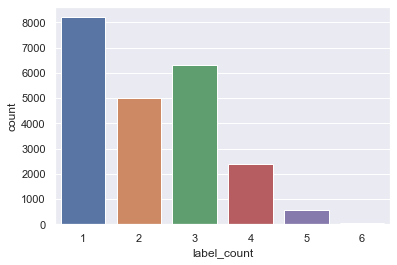

In [45]:
# get number of labels for un-clean comments

df['label_count'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['insult'] + df['identity_hate'] + df['threat']

sns.set(style="darkgrid")
ax = sns.countplot(x='label_count', data=df[df['label_count'] > 0])

In [54]:
# defining functions
def Show_Conditional_Probabilities(data, feature_list):
    for conditional_feature in feature_list:
        print("\nCalculating for {}...".format(conditional_feature))
        subdf = data[data[conditional_feature]==1]
        total = len(subdf)
        
        for given_feature in feature_list:
            if given_feature != conditional_feature:
                temp = subdf[subdf[given_feature]==1]
                count = len(temp)
                probability = count / total
                
                print("P({} | {})={}%"\
                      .format(given_feature, conditional_feature, round(probability*100, 1)))


In [55]:
# check conditional probabilities to see if any label is dependant on any other label

labels = ['toxic', 'severe_toxic', 'obscene', 'insult', 'identity_hate', 'threat']
Show_Conditional_Probabilities(df, labels)


Calculating for toxic...
21384
P(severe_toxic | toxic)=9.2%
P(obscene | toxic)=54.0%
P(insult | toxic)=50.0%
P(identity_hate | toxic)=9.3%
P(threat | toxic)=3.1%

Calculating for severe_toxic...
1962
P(toxic | severe_toxic)=100.0%
P(obscene | severe_toxic)=95.8%
P(insult | severe_toxic)=86.7%
P(identity_hate | severe_toxic)=22.8%
P(threat | severe_toxic)=8.1%

Calculating for obscene...
12140
P(toxic | obscene)=95.2%
P(severe_toxic | obscene)=15.5%
P(insult | obscene)=73.2%
P(identity_hate | obscene)=12.9%
P(threat | obscene)=3.6%

Calculating for insult...
11304
P(toxic | insult)=94.5%
P(severe_toxic | insult)=15.0%
P(obscene | insult)=78.6%
P(identity_hate | insult)=15.6%
P(threat | insult)=3.9%

Calculating for identity_hate...
2117
P(toxic | identity_hate)=94.2%
P(severe_toxic | identity_hate)=21.2%
P(obscene | identity_hate)=74.2%
P(insult | identity_hate)=83.2%
P(threat | identity_hate)=6.8%

Calculating for threat...
689
P(toxic | threat)=94.9%
P(severe_toxic | threat)=22.9%
P(

In [56]:
# drop label_count and export the file to csv

df.drop(['label_count'], axis=1)
df.to_csv('combined_data.csv', index=False)